In [1]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#file path
csv_path = "../Resources/crimedata-33613-5yr.csv"
crime_data_df = pd.read_csv(csv_path)
crime_data_df.head(10)

,OBJECTID,Case Number,Crime Type,Crime Type Extension,Reported Date,Address,zip
0,854734,2016-281,DUI,DUI (DRIVING UNDER INFLUENCE),1/1/2016,FLORIDA AV N / WINDWOOD OAKS DR,33613
1,854771,2016-1464,TRAFFIC,Property Damage,1/1/2016,FLORIDA AV N / LAKE MAGDALENE BL,33549
2,854779,2016-1188,TRAFFIC,Property Damage,1/1/2016,BRUCE B DOWNS BL / 138TH AV E,33613
3,854780,2016-1268,TRAFFIC,Property Damage,1/1/2016,BRUCE B DOWNS BL / FLETCHER AV E,33613
4,854787,2015-849017,TRAFFIC,Property Damage,1/1/2016,15TH ST N / FLETCHER AV E,33612
5,854860,2016-1997,DRUGS,DRUGS/NARCOTICS,1/1/2016,BEARSS AV E / 17TH ST N,33549
6,854866,2016-60,BATTERY,BATTERY-SIMPLE,1/1/2016,13600 BLOCK GRAGSTON CR,33613
7,854929,2016-2990,BURGLARY,THEFT FROM A VEHICLE,1/2/2016,4000 BLOCK DREAM OAK PL,33613
8,854973,2016-2413,TRAFFIC,Non Incapacitating Injury,1/2/2016,FLETCHER AV E / BRUCE B DOWNS BL,33613
9,854977,2016-3345,THEFT,THEFT FROM A BUILDING,1/2/2016,13700 BLOCK 42ND ST N,33613


In [2]:
#identify columns names used in the data
crime_data_df.columns

Index(['OBJECTID', 'Case Number', 'Crime Type', 'Crime Type Extension',
       'Reported Date', 'Address', 'zip'],
      dtype='object')

In [3]:
#remove some columns from the data 
reduced_crime_data_df = crime_data_df.loc[:, ['Reported Date', 'Case Number', 'Crime Type', 'Crime Type Extension'
       , 'zip']]
reduced_crime_data_df.head(10)

,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,1/1/2016,2016-281,DUI,DUI (DRIVING UNDER INFLUENCE),33613
1,1/1/2016,2016-1464,TRAFFIC,Property Damage,33549
2,1/1/2016,2016-1188,TRAFFIC,Property Damage,33613
3,1/1/2016,2016-1268,TRAFFIC,Property Damage,33613
4,1/1/2016,2015-849017,TRAFFIC,Property Damage,33612
5,1/1/2016,2016-1997,DRUGS,DRUGS/NARCOTICS,33549
6,1/1/2016,2016-60,BATTERY,BATTERY-SIMPLE,33613
7,1/2/2016,2016-2990,BURGLARY,THEFT FROM A VEHICLE,33613
8,1/2/2016,2016-2413,TRAFFIC,Non Incapacitating Injury,33613
9,1/2/2016,2016-3345,THEFT,THEFT FROM A BUILDING,33613


In [4]:
#columns to use in the table below 
columns = [
    "Reported Date", "Case Number", "Crime Type", "Crime Type Extension", "zip"
]
#create a new DF for non Traffic related crimes
data_crime_no_traffic_df = reduced_crime_data_df.loc[reduced_crime_data_df["Crime Type"] != "TRAFFIC", columns]
data_crime_no_traffic_df.head(10)


,Reported Date,Case Number,Crime Type,Crime Type Extension,zip
0,1/1/2016,2016-281,DUI,DUI (DRIVING UNDER INFLUENCE),33613
5,1/1/2016,2016-1997,DRUGS,DRUGS/NARCOTICS,33549
6,1/1/2016,2016-60,BATTERY,BATTERY-SIMPLE,33613
7,1/2/2016,2016-2990,BURGLARY,THEFT FROM A VEHICLE,33613
9,1/2/2016,2016-3345,THEFT,THEFT FROM A BUILDING,33613
10,1/2/2016,2016-3552,BATTERY,BATTERY-SIMPLE,33613
11,1/2/2016,2016-3795,BURGLARY,BURGLARY RESIDENCE / FORCED,33613
12,1/2/2016,2016-4167,MISCHIEF,CRIMINAL MISCHIEF MISDEMEANOR,33613
13,1/2/2016,2016-2811,THEFT,PETIT THEFT - ALL OTHER,33613
14,1/2/2016,2016-2519,BATTERY,BATTERY-SIMPLE,33613


In [5]:
#count all non traffic related crimes
data_crime_no_traffic_df["Case Number"].count()

10688

In [6]:
#list of crimes and count
crime_type = data_crime_no_traffic_df.groupby("Crime Type")
crime_type["Case Number"].count()

Crime Type
ARSON         12
ASSAULT      197
BATTERY     2369
BURGLARY    1324
DRUGS       1526
DUI          429
FIRE          21
FRAUD        759
HARASS        27
MISCHIEF     968
MURDER        13
ROBBERY      182
THEFT       2861
Name: Case Number, dtype: int64

In [7]:
#dates when a crime had been recorded
crime_date = data_crime_no_traffic_df.groupby("Reported Date")
crime_date["Case Number"].count()

Reported Date
1/1/2016     3
1/1/2017    15
1/1/2018     8
1/1/2019     6
1/1/2020     8
            ..
9/9/2016     8
9/9/2017     3
9/9/2018     7
9/9/2019    10
9/9/2020     6
Name: Case Number, Length: 1816, dtype: int64

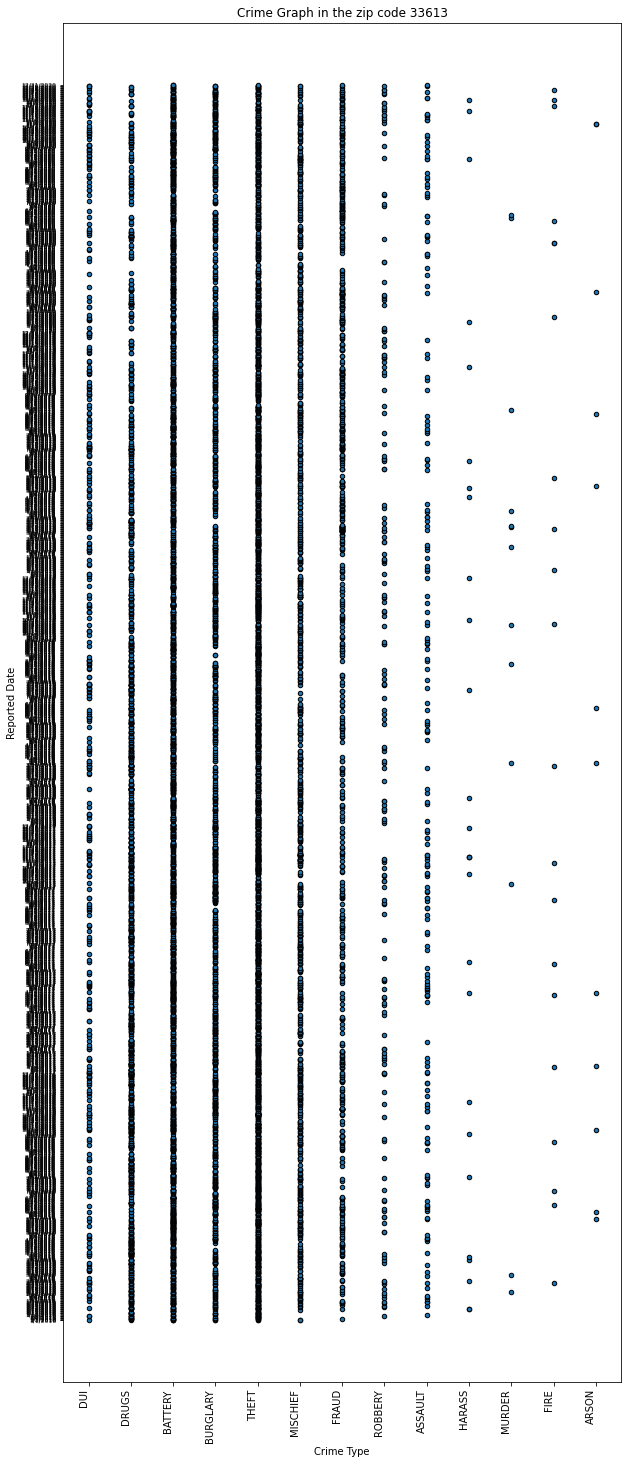

In [8]:
data_crime_no_traffic_df.plot(kind="scatter", x="Crime Type", y="Reported Date", figsize=(10,25),
                              facecolors="red", edgecolors="black", title="Crime Graph in the zip code 33613")
plt.xticks(rotation=90,  horizontalalignment='right', fontweight='light', fontsize='medium',)
plt.yticks(horizontalalignment='right', fontweight='light', fontsize=6)
plt.show()